# Predicting changes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mwc_induction_utils as mwc
colors = mwc.set_plotting_style()

%matplotlib inline

The purpose of this notebook will be to generate plots showing the predictions from changing growth rate or temperature.   

In [7]:
# Define some parameters. 
R_space = np.logspace(0, 4, 500) # Number of Repressors
R_range = [1, 10, 100, 1000]
c_space = np.logspace(-9, -2, 500) # Concentration of Inducer in M
t_range = [13.5, 22,  37, 48] # Range of temperatures in C
ep_r = -13.9  # DNA binding energy in units of kBT
ep_ai = 4.5  # Active/Inactive energy in units of kBT
KA = 139E-6  # Dissociation constant to active repressor
KI = 0.59E-6  # Dissociation constant to inactive repressor
T_STD = 37 + 273.15  # Set the standard temperature. 

# Convert the KA/KI to energies for temperature business
ep_a = -np.log(KA)
ep_i = -np.log(KI)

For simplicity, I will define some functions to calculate the fold-change for a simple repression system with two inducer binding sites. 

In [46]:
def pact(c_range, ep_a, ep_i, ep_ai=4.5, temp=310.15):
    T_STD = 310.15
    T_rel = T_STD / temp 
    numer = (1 + c_range * np.exp(-ep_a * T_rel))**2
    denom = numer + np.exp(-ep_ai * T_rel) * (1 + c_range * np.exp(-ep_i *T_rel))**2
    return numer / denom

def fc_rep(R, ep_r, c_range, ep_a=np.log(KA), ep_i=np.log(KI),\
           ep_ai=4.5, temp=310.15, n_ns=4.6E6):
    T_STD = 310.15
    T_rel = T_STD / temp
    r_act = pact(c_range, ep_a, ep_i, ep_ai=ep_ai, temp=temp) 
    r_act *= R/n_ns
    return (1 + r_act * np.exp(-ep_r * T_rel))**-1 

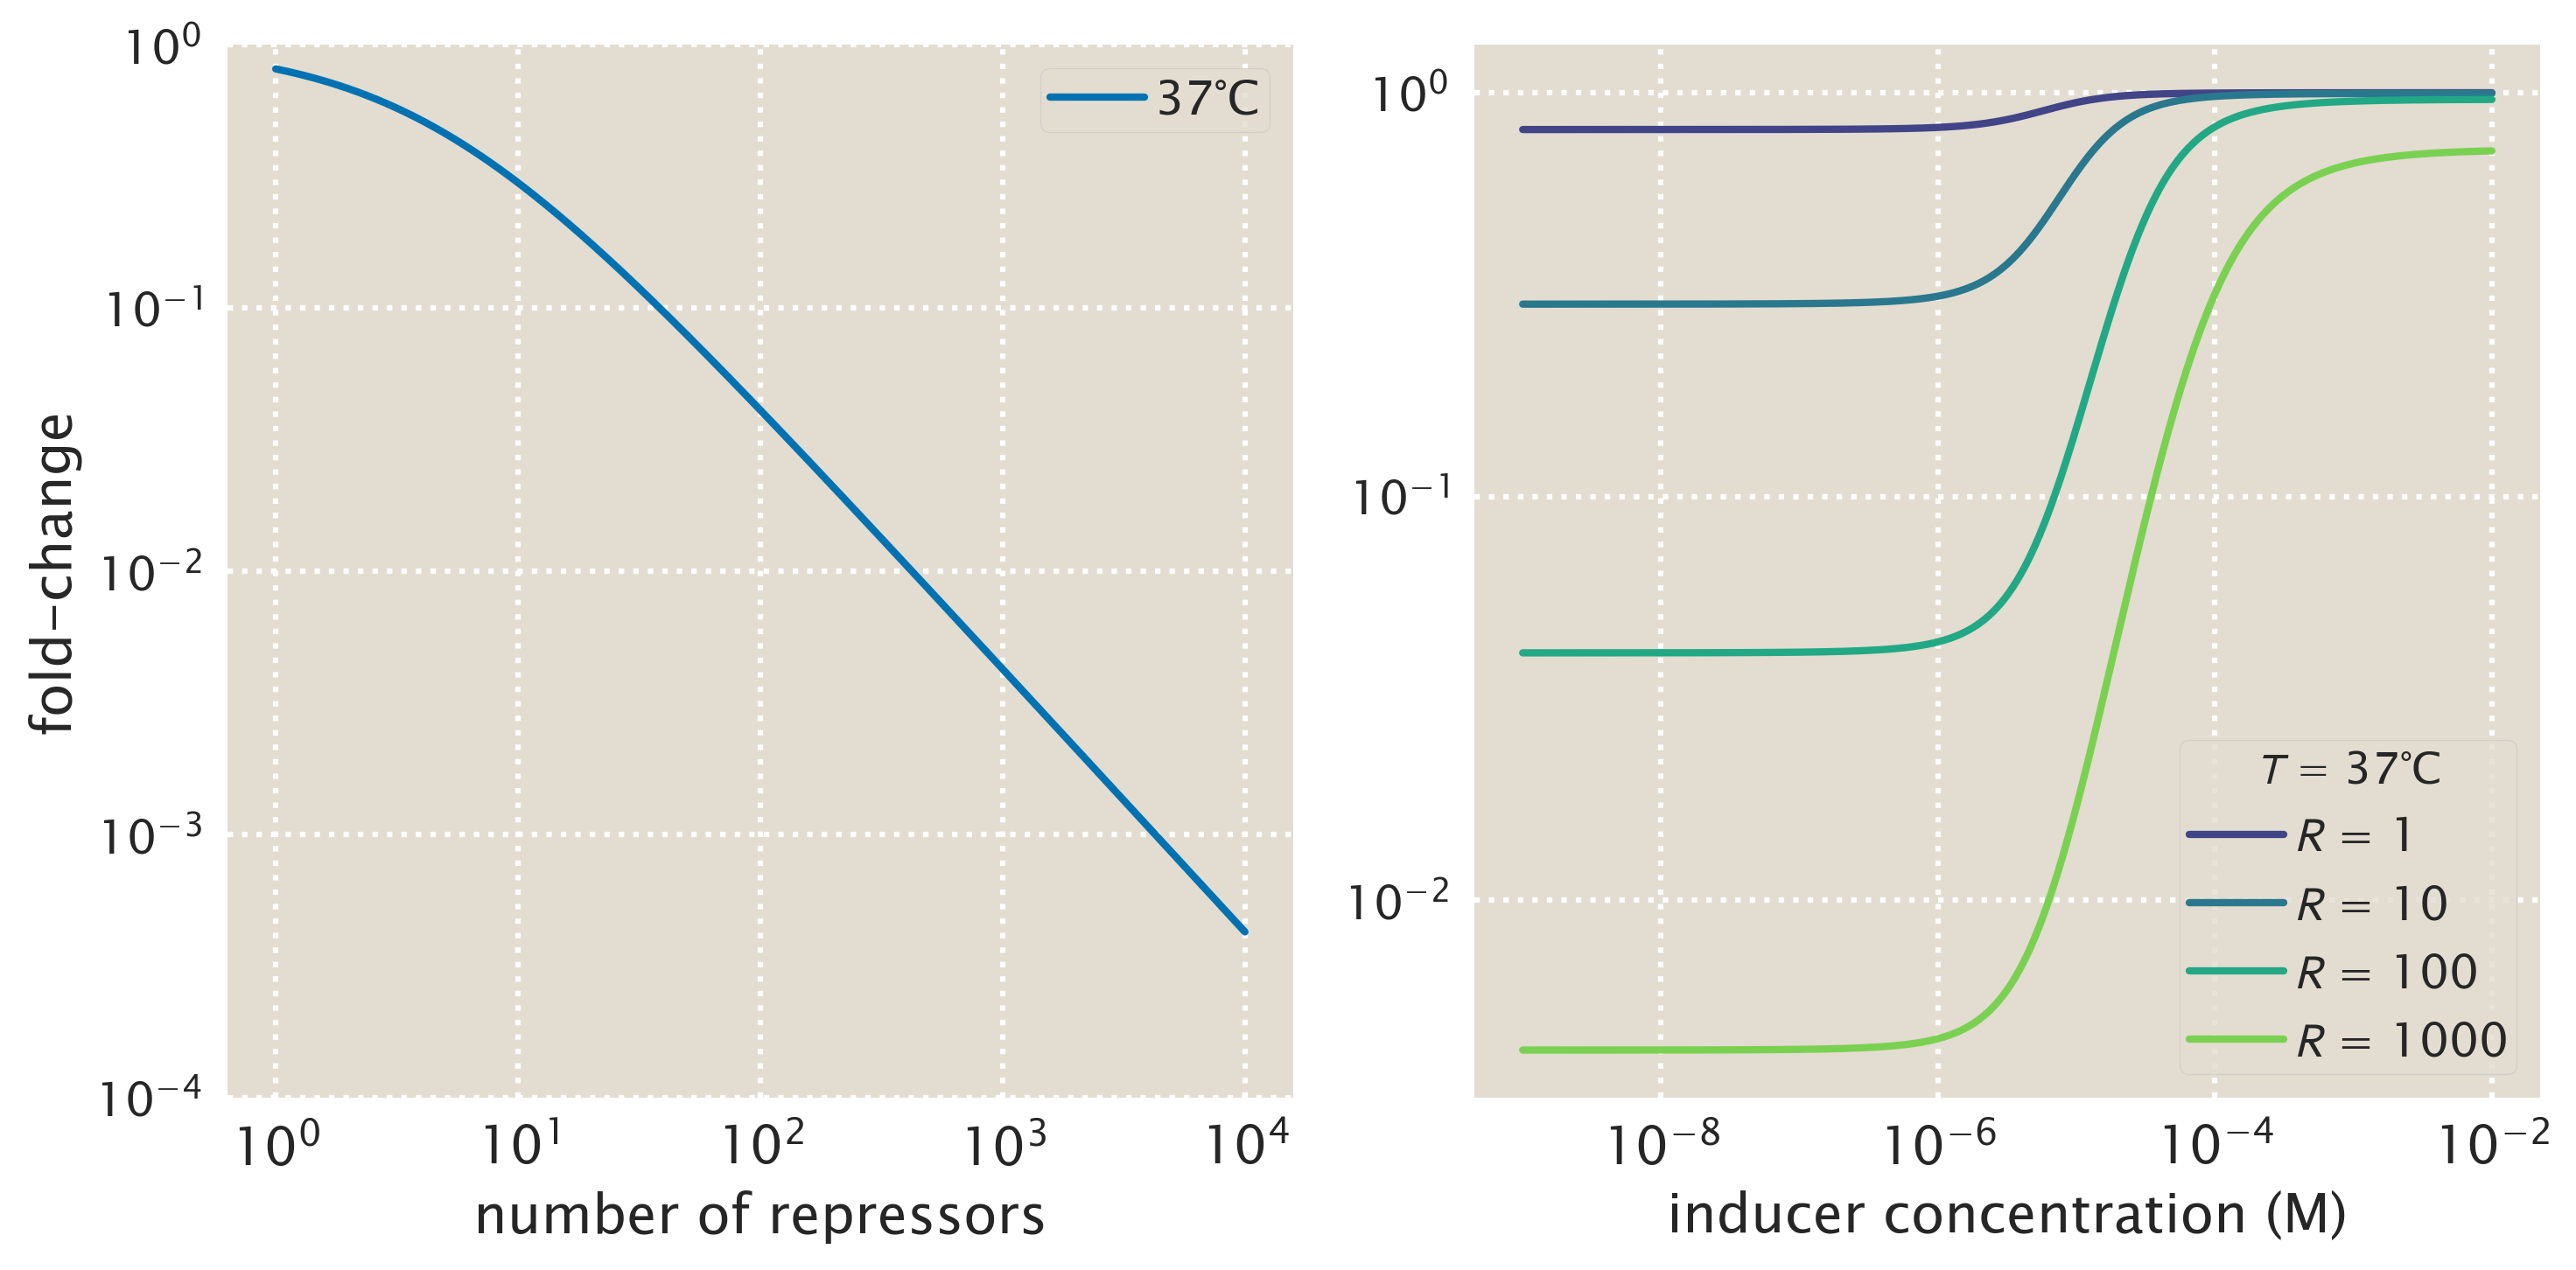

In [53]:
# Set up the figure canvas. 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
tf_titration = fc_rep(R_space, ep_r, 0)
colors = sns.color_palette('viridis', n_colors=4)
ax[0].loglog(R_space, tf_titration, color='b', lw=2, label='37°C')
for i, R in enumerate(R_range):
    ind_titration = fc_rep(R, ep_r, c_space)
    ax[1].loglog(c_space, ind_titration, lw=2, label='$R$ = {0}'.format(R),
                color=colors[i])
ax[0].set_xlabel('number of repressors', fontsize=15)
ax[0].set_ylabel('fold-change', fontsize=15)
ax[1].set_xlabel('inducer concentration (M)', fontsize=15)
ax[0].legend(loc='upper right')
ax[1].legend(loc='lower right', title='$T$ = 37°C')
ax[0].set_ylim([1E-4, 1])

plt.tight_layout()
plt.savefig('fixed_temperature_predictions.pdf', bbox_inches='tight')

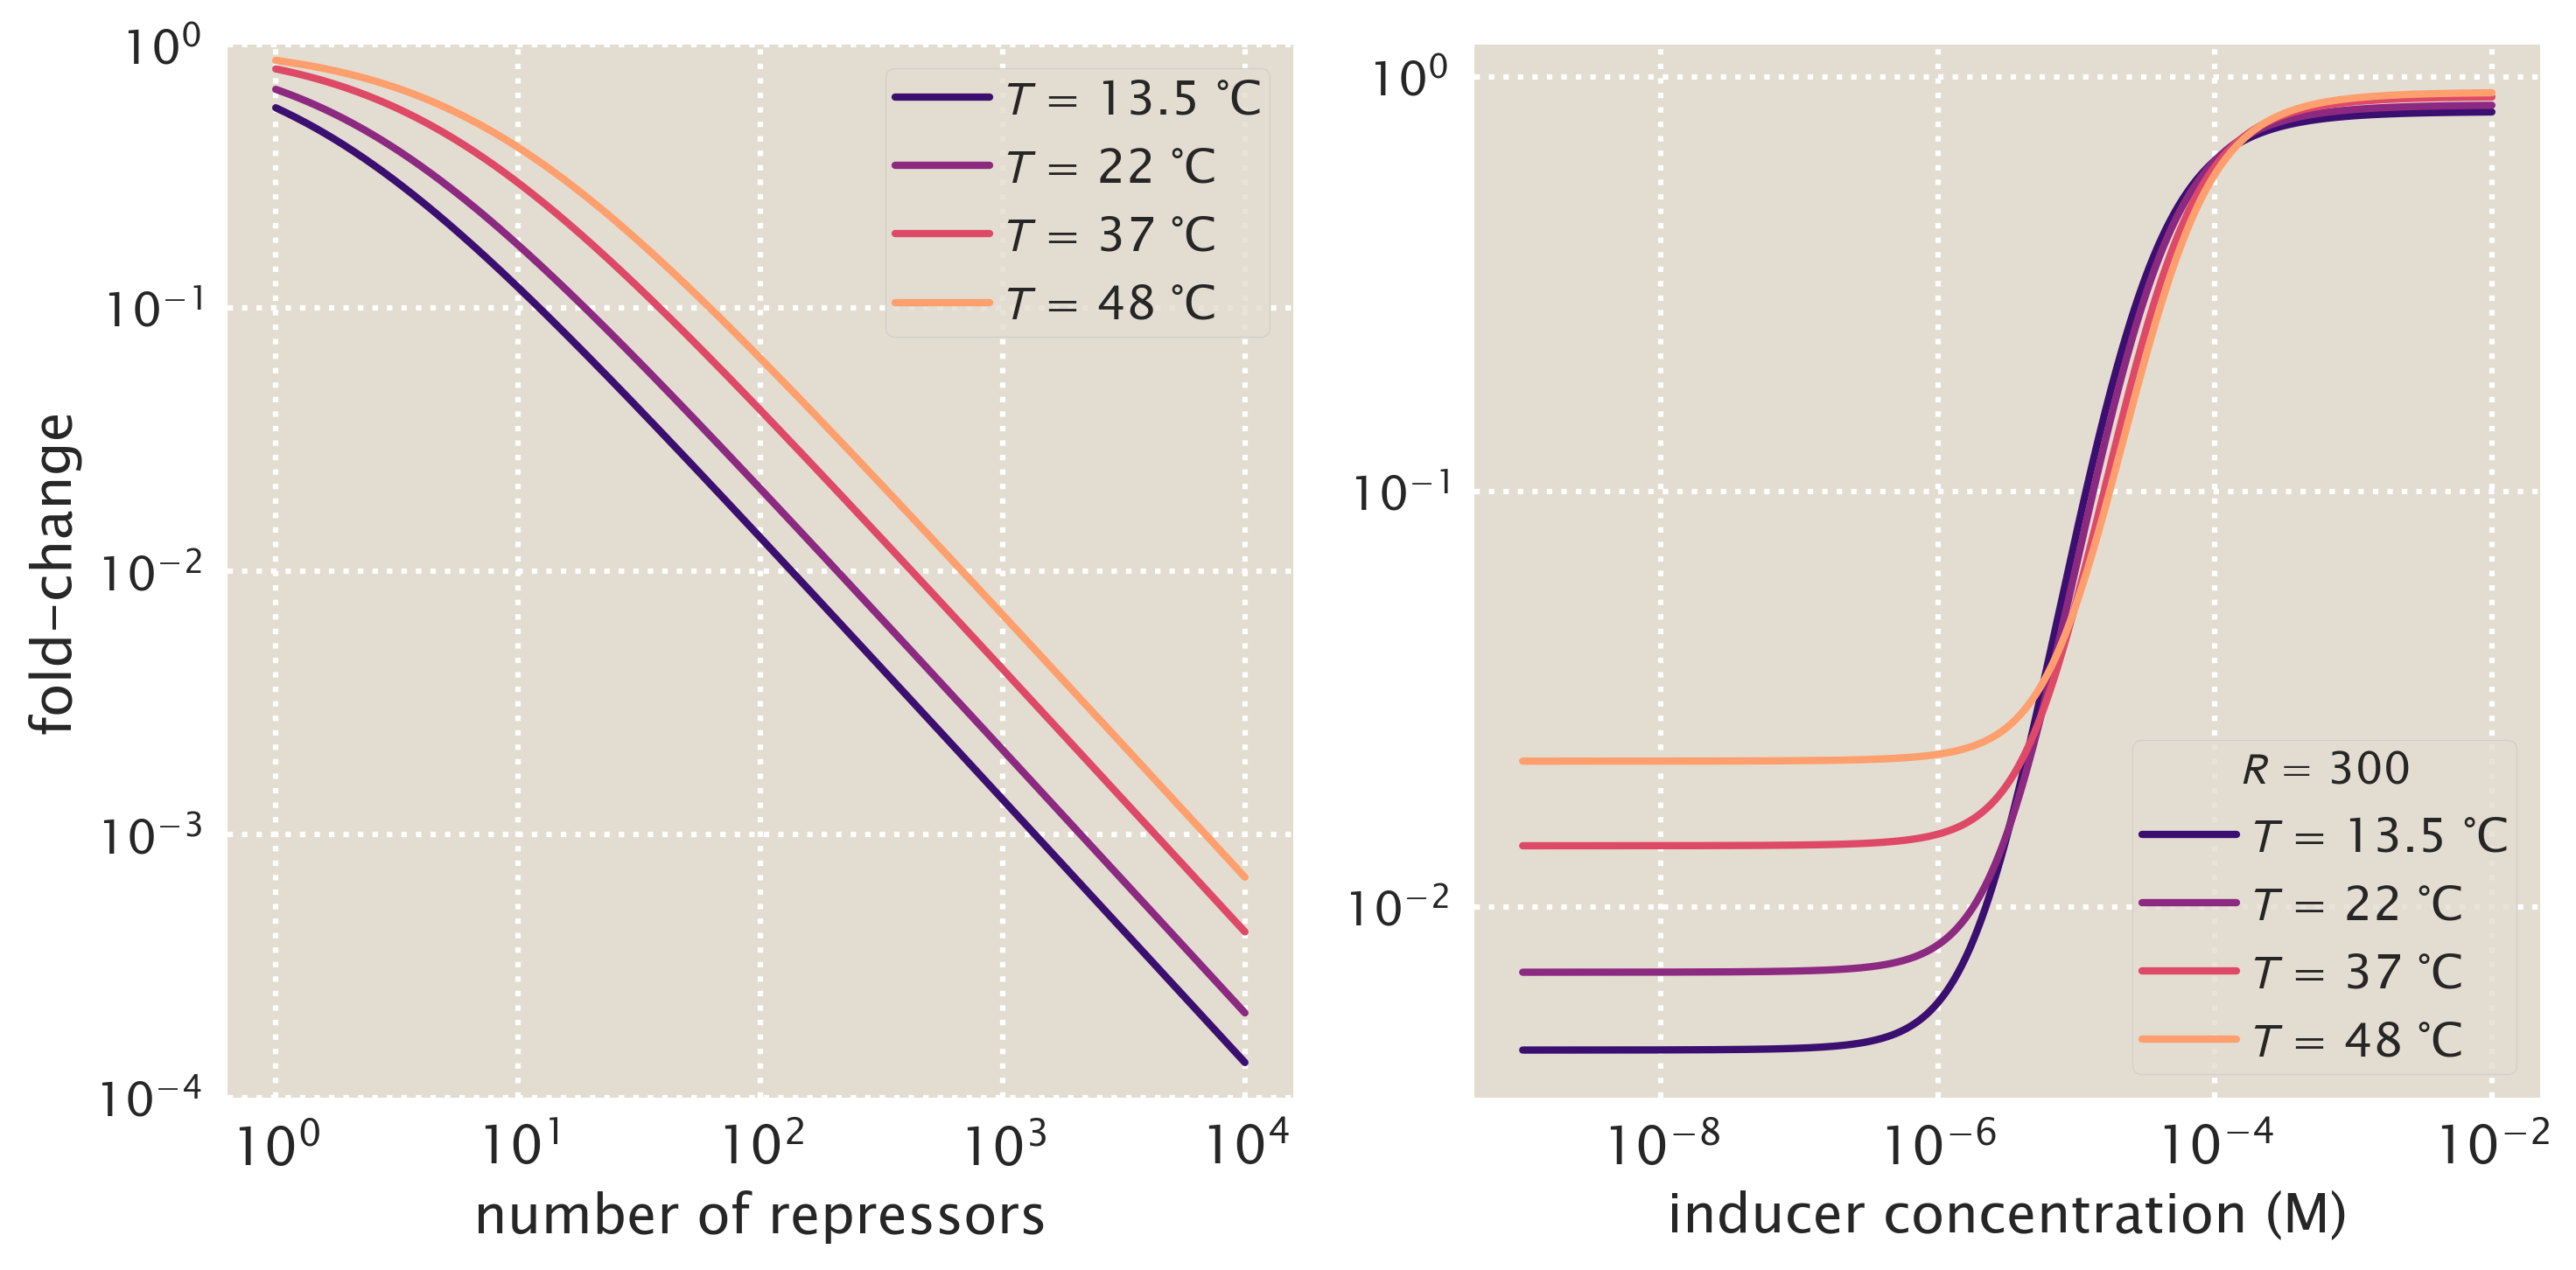

In [52]:
# Set up the figure canvas. 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
colors = sns.color_palette('magma', n_colors=len(t_range))
R_STD = 300
for i, t in enumerate(t_range):
    tf_titration = fc_rep(R_space, ep_r, 0, temp=t + 273.15)
    ax[0].loglog(R_space, tf_titration, color=colors[i], label='$T$ = {0} °C'.format(t))
    ind_titration = fc_rep(R_STD, ep_r, c_space, temp=t + 273.15)
    ax[1].loglog(c_space, ind_titration, lw=2, label='$T$ = {0} °C'.format(t),
                 color=colors[i])
ax[0].set_xlabel('number of repressors', fontsize=15)
ax[0].set_ylabel('fold-change', fontsize=15)
ax[1].set_xlabel('inducer concentration (M)', fontsize=15)
ax[0].legend(loc='upper right')
ax[1].legend(loc='lower right', title='$R$ = {0}'.format(R_STD))
ax[0].set_ylim([1E-4, 1])
plt.tight_layout()
plt.savefig('varying_temperature_predictions.pdf', bbox_inches='tight')